**Why Data Mining is a misnomer? What is another preferred name? ** 🧐




The term "data mining" is a misnomer, because the goal is the extraction of patterns and knowledge from large amounts of data, not the extraction (mining) of data itself. Another prefered names is knowledge discovery from database or knowledge extraction




**What is the general knowledge discovery process? What is the difference between a data engineer and data scientist/AI engineer?**   😇


KDD refers to the overall process of discovering useful knowledge from data which involves( data selection, data cleaning and preprocessing, data transformation, data mining, pattern evaluation) Data Engineers collect relevant Data. They move and transform this Data into “pipelines” for the Data Science team. Data Scientists analyze, test, aggregate, optimize the data and present it for the company.

**In data mining, what is the difference between prediction and categorization?   💡**

Classification is to predict categorical class labels( nominal/ discrete) while prediction models continuous-valued functions

**Why data science/machine learning is a bad idea in the context of information security?**
• There is no personal privacy • Difficult to verify against compliance • Increased risk of data breach and fine • Responsibility, accountability, liability • Should be part of the risk management framework

**What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?**


CIA refers to an information security model made up of the three main components: confidentiality, integrity and availability. Each component represents a fundamental objective of information security. confidentiality is to prevent sensitive information from unauthorized access attempts. Loss of confidentiality may lead to disclosure of personal information, proprietary information and government classified information Integrity and availability involves maintaining the consistency, accuracy and trustworthiness of data over its entire lifecycle. any corruption may lead to unauthorized transactions, wrong execution of software or orruption of data. Availability of information is that it should be consistently and readily accessible for authorized parties which involves properly maintaining hardware and technical infrastructure and systems that hold and display the information. Invailability may result denial of Service or loss of Data




                   **Problem** **formulation**  😕🔓



This project is about Wish.com Product Rating Prediction.The data is uncleaned with some missing values which need preprocessing.

We have 1095 training samples and 480 test sample to predict. We have 34 features. the output is the predicted rating
Data mining function required is classfication. We have many challenges as data requires many preprocessing due to the existence of dirty data and also we need


our goal is to predict the product ratings given the other features known for a product on Wish.com. Ratings should in categories from 1 to 5. For one product, the higher the rating is, the more the customers like the product.

We have many challenges as data requires many preprocessing due to the existence of dirty data and also we need hyperparameter tuning to find out the best paramter that will reults the best performance By predicting the rating wish.com will be able to predict which product will help in improving customer experience and increase their sales so the solution 🔐

In [139]:
#load the train data
import pandas as pd
import numpy as np
df = pd.read_csv('/content/train_new.csv') 
print(df.shape)
df

(1094, 34)


,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,...,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,...,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,...,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,...,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,...,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,EUR,10000,0,4.0,2150,0,0,0,...,fantastic_tune,"92 % avis positifs (230,951 notes)",230951,4.311066,53f2db3c104dae6bcae0c271,0,NaN,summer,2020-08,1381
1090,5.00,5,EUR,1000,0,5.0,377,1,0,1,...,zzbllss,"(2,904 notes)",2904,4.422521,592968ba63950d682ca4b195,0,NaN,summer,2020-08,212
1091,9.00,48,EUR,1000,1,4.0,135,0,0,0,...,oiug56465,"78 % avis positifs (6,632 notes)",6632,3.748794,5b6ec2f2838d931d2fbf7a28,0,NaN,summer,2020-08,163
1092,11.00,10,EUR,10000,1,4.0,1479,0,0,0,...,yubenqiang,"83 % avis positifs (5,816 notes)",5816,3.936382,58330d7def56284f7634e5e5,0,NaN,summer,2020-08,674


In [140]:
df.dtypes


price                           float64
retail_price                      int64
currency_buyer                   object
units_sold                        int64
uses_ad_boosts                    int64
rating                          float64
rating_count                      int64
badges_count                      int64
badge_local_product               int64
badge_product_quality             int64
badge_fast_shipping               int64
tags                             object
product_color                    object
product_variation_size_id        object
product_variation_inventory       int64
shipping_option_name             object
shipping_option_price             int64
shipping_is_express               int64
countries_shipped_to              int64
inventory_total                   int64
has_urgency_banner              float64
urgency_text                     object
origin_country                   object
merchant_title                   object
merchant_name                    object


In [141]:
#Converting the rating to range from 1 to 5
df=df.loc[df['rating'].isin([1,2,3,4,5])]

In [142]:
id_1= df['id']

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

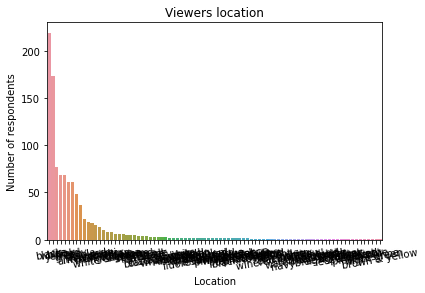

In [144]:
#visualize the Number of respondents in the location due to product_color
sns.barplot(x=df['product_color'].value_counts().index,y=df['product_color'].value_counts().values)

plt.xlabel('Location')
plt.ylabel('Number of respondents')
plt.xticks(rotation=10)
plt.title('Viewers location')
plt.show()

In [145]:
import numpy as np
#visualizing the numeric columns 
df_numeric = df.select_dtypes(include=np.number)
df_numeric.columns

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping',
       'product_variation_inventory', 'shipping_option_price',
       'shipping_is_express', 'countries_shipped_to', 'inventory_total',
       'has_urgency_banner', 'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', 'id'],
      dtype='object')

In [146]:
#visualizing the categorical columns
df_categorical = df.select_dtypes(include =['object'])
df_categorical.columns

Index(['currency_buyer', 'tags', 'product_color', 'product_variation_size_id',
       'shipping_option_name', 'urgency_text', 'origin_country',
       'merchant_title', 'merchant_name', 'merchant_info_subtitle',
       'merchant_id', 'merchant_profile_picture', 'theme', 'crawl_month'],
      dtype='object')

In [147]:
df['product_color'].value_counts()


black               219
white               173
blue                 77
yellow               69
pink                 68
green                61
red                  61
grey                 48
purple               37
armygreen            22
winered              19
navyblue             18
orange               16
multicolor           14
khaki                10
white & green         8
lightblue             8
coffee                6
gray                  6
skyblue               6
beige                 5
brown                 5
rosered               5
rose                  4
lightpink             4
darkblue              4
White                 3
Black                 3
black & green         3
black & white         3
navy                  3
burgundy              2
white & black         2
coolblack             2
Army green            2
lightgreen            2
floral                2
dustypink             2
applegreen            2
orange-red            2
fluorescentgreen      2
lightred        

In [148]:
#visualize numeric data correlation
import plotly.express as px
fig = px.imshow(df_numeric.corr())
fig.show()

In [149]:
#Checking the count of NaN values in al the columns
df.duplicated().sum()
df.isnull().sum()

price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    29
product_variation_size_id        12
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              744
urgency_text                    744
origin_country                   12
merchant_title                    0
merchant_name                     4
merchant_info_subtitle            0
merchant_rating_count             0
merchant_rating             

In [150]:
# First, lets drop duplicates (if any)
df= df.drop_duplicates()

In [151]:
#Checking the count of NaN values in al the columns
df.duplicated().sum()
df.isnull().sum()

price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    29
product_variation_size_id        12
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              744
urgency_text                    744
origin_country                   12
merchant_title                    0
merchant_name                     4
merchant_info_subtitle            0
merchant_rating_count             0
merchant_rating             

In [152]:
#still having columns should be preprocessed as shown in  the previous cell

In [153]:
Country = df.loc[:, 'origin_country']
Country

0       CN
1       CN
2       CN
3       CN
4       CN
        ..
1089    CN
1090    CN
1091    CN
1092    CN
1093    CN
Name: origin_country, Length: 1093, dtype: object

In [154]:
#Filling the Nan values with the most frequent value which is CN
df.loc[:, 'origin_country']=Country.fillna('CN')

<Axes: xlabel='origin_country', ylabel='count'>

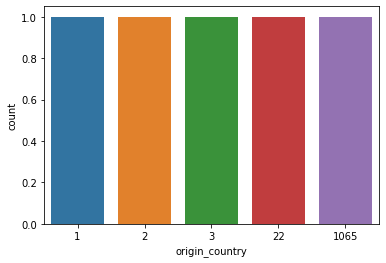

In [155]:
#plotting the values of origin_country
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=Country.value_counts())

In [156]:
#when seeing the data set som columns like has_urgency_banne has nan values we should preprocessed it

In [157]:
Urgency = df.loc[:,'has_urgency_banner']
Urgency

0       NaN
1       NaN
2       NaN
3       NaN
4       1.0
       ... 
1089    NaN
1090    NaN
1091    NaN
1092    1.0
1093    1.0
Name: has_urgency_banner, Length: 1093, dtype: float64

In [158]:
#Filling the Nan values with zero which express that there was no urgency or troubles with this transaction
df.loc[:, 'has_urgency_banner']=Urgency.fillna(0)

In [159]:
#Checking urgent text 
df['urgency_text'].value_counts()

Quantité limitée !                  348
Réduction sur les achats en gros      1
Name: urgency_text, dtype: int64

In [160]:
# handling urgency_text column
df['urgency_text'] = df['urgency_text'].replace({
    'Quantité limitée !' : 'Limited Quantity', 
    'Réduction sur les achats en gros': 'Wholesale discount', 
    np.nan: 'None'
})

In [161]:
total_missing = df.isnull().sum().sort_values(ascending=False)


In [162]:
#showing total missing values in data
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total_missing, percent], axis=1, keys=['Total Missing', 'Percent'])
missing_data.head(20)

,Total Missing,Percent
merchant_profile_picture,923,84.446478
product_color,29,2.653248
product_variation_size_id,12,1.097896
merchant_name,4,0.365965
price,0,0.000000
has_urgency_banner,0,0.000000
urgency_text,0,0.000000
origin_country,0,0.000000
merchant_title,0,0.000000
merchant_info_subtitle,0,0.000000


In [163]:
total_train = df.isnull().sum().sort_values(ascending=False)

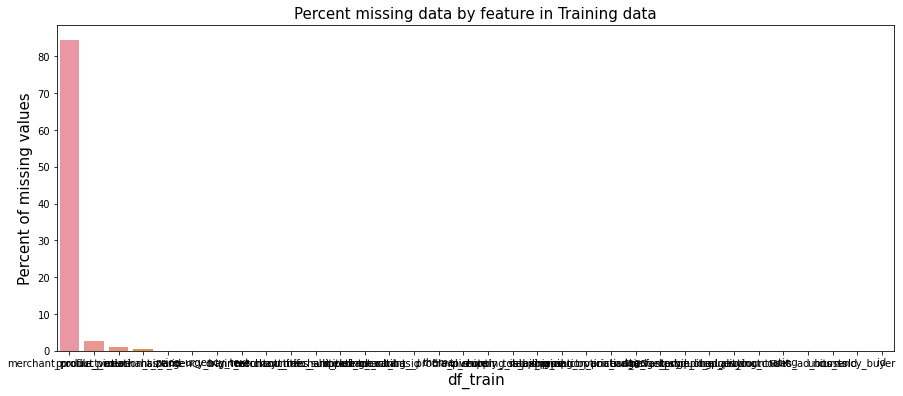

In [164]:
# Show the total missing values and Percent in Training data 
missing_data = pd.concat([total_train, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))

sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('df_train', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature in Training data', fontsize=15)
plt.show()



In [165]:
#Geting the number of existence of each value in product_variation_size_id column
pd.options.display.max_rows = 100
df['product_variation_size_id'].value_counts()

S                               444
XS                              248
M                               135
XXS                              76
L                                29
S.                               13
XL                               12
XXL                              11
XXXS                              5
M.                                4
Size-XS                           4
Size S                            4
4XL                               4
XS.                               4
Size-S                            3
2XL                               3
10 ml                             3
s                                 3
Size M                            2
35                                2
Size4XL                           2
Size -XXS                         2
SizeL                             2
25                                2
SIZE XS                           2
29                                2
S Pink                            2
33                          

In [166]:
#we will find a great variation between our values and alot of values with the same meaning but written in different way in our dataset that should be handled

In [167]:
#Gathering all the value with the same meaning and replacing its name with its actual name
df['product_variation_size_id'].replace(['S', 'S.', 's', 'Size S', 'Size-S', 'Size S.', 'Suit-S', 'size S','S Pink', 'pants-S', 'US-S', 'SIZE S', 'S (waist58-62cm)', 'Size--S', '25-S', 'Size/S', 'S Diameter 30cm', 'S..', 'S(Pink & Black)'], 'S', inplace=True)
df['product_variation_size_id'].replace(['XS', 'XS.', 'SIZE XS', 'Size-XS'], 'XS', inplace=True)
df['product_variation_size_id'].replace(['XXS', 'XXXS', 'SIZE-XXS', 'Size -XXS', 'Size XXS', 'Size-XXS', 'SIZE XXS'], 'XXS+', inplace=True)
df['product_variation_size_id'].replace(['M', 'M.', 'Size M'], 'M', inplace=True)
df['product_variation_size_id'].replace(['L', 'SizeL', '32/L', 'L.', 'Size-L'], 'L', inplace=True)
df['product_variation_size_id'].replace(['XL', '2XL', '1 PC - XL', 'X   L'], 'XL', inplace=True)
df['product_variation_size_id'].replace(['XXL', '4XL', '2XL', 'Size4XL', '3XL', 'XXXXXL', '1 PC - XL', 'SIZE-4XL', '04-3XL', 'Size-5XL', 'XXXXL', '5XL', 'XXXL'], 'XXL+', inplace=True)
size_val_counts = df['product_variation_size_id'].value_counts()
# Select the values where the count is less than 5 and Nans and puting them under category other
minority = size_val_counts[size_val_counts <= 5].index
df.loc[df['product_variation_size_id'].isin(minority), 'product_variation_size_id'] = "Other"
df['product_variation_size_id'] = df['product_variation_size_id'].replace(np.nan, "Other")

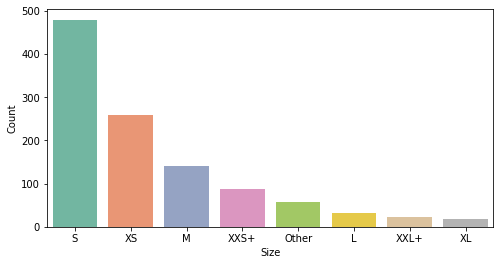

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
#ploting size column after handling it
plt.figure(figsize=(8, 4))
ax = sns.countplot(x = 'product_variation_size_id',
                   order = df['product_variation_size_id'].value_counts().index,
                   palette= "Set2",
                   data=df)
ax.set(xlabel='Size', ylabel='Count')

plt.show()

In [169]:
#Getting the unique values 
colors = df['product_color'].unique()

In [170]:
# convert to lower case
df['product_color'] = df['product_color'].str.lower()
# remove trailing white spaces
df['product_color'] = df['product_color'].str.strip()
df['product_color'].head(20)

0       yellow
1        black
2        white
3     lakeblue
4      apricot
5        black
6        white
7        brown
8      winered
9         blue
10         red
11       white
12    navyblue
13       black
14      yellow
15       green
16      yellow
17       khaki
18       green
19       white
Name: product_color, dtype: object

In [171]:
#Defing a dictionary with all the colors in our dataset and its corresponing color that it belongs to
color_Switch = {
'Black' : 'black',
'coolblack': 'black',
'White': 'white',
'offwhite': 'white', 
'bluue': 'blue',
'prussianblue': 'blue',
'navyblue': 'blue', 
'navy blue': 'blue',
'lightblue': 'blue',
'skyblue': 'blue',
'darkblue': 'blue',
'navy' : 'blue',
'bluee': 'blue',
'bluue': 'blue',
'denimblue': 'blue', 
'lakeblue': 'blue', 
'Blue': 'blue',
'gold': 'yellow',
'lightyellow': 'yellow',
'winered': 'red',
'rosered': 'red',
'watermelonred': 'red',
'RED': 'red',
'winered': 'red',
'wine red': 'red',
'rose': 'red',
'orange-red': 'red',
'Rose red': 'red',
'wine': 'red',
'coralred': 'red',
'burgundy': 'red', 
'lightred': 'red', 
'lightpink': 'pink',
'Pink': 'pink',
'dustypink': 'pink',
'armygreen':'green',
'khaki': 'green',
'lightgreen': 'green',
'fluorescentgreen': 'green',
'army green': 'green',
'applegreen': 'green',
'Army green': 'green',
'mintgreen': 'green',
'army': 'green', 
'lightkhaki': 'green', 
'darkgreen': 'green', 
'light green': 'green', 
'lightkhaki': 'green', 
'lightgray': 'grey', 
'apricot': 'orange',
'violet': 'purple',
'lightpurple': 'purple', 
'gray': 'grey',
'silver': 'grey',
'coffee': 'brown', 
'blackwhite': 'dual', 
 np.nan: 'other'}

In [172]:
#matching each color to its corresponding color category and the rest to others
def switch(color): 
    if color in color_Switch: 
        return color_Switch[color]
    elif color in color_Switch.values(): 
        return color
    elif '&' in color: 
        return 'dual'
    else:
        return 'other'
df['product_color'] = df.product_color.apply(switch)

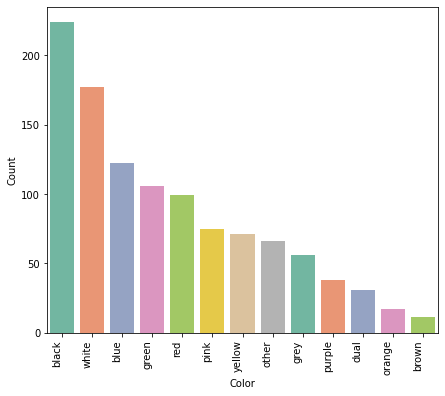

In [173]:
#Plotting the data after handling it
plt.figure(figsize=(7, 6))
ax = sns.countplot(x = 'product_color',
                   order = df['product_color'].value_counts().index,
                   palette= "Set2",
                   data=df)
ax.set(xlabel='Color', ylabel='Count')
plt.xticks(rotation=90, ha='right')
plt.show()

In [174]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1093
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1093 non-null   float64
 1   retail_price                  1093 non-null   int64  
 2   currency_buyer                1093 non-null   object 
 3   units_sold                    1093 non-null   int64  
 4   uses_ad_boosts                1093 non-null   int64  
 5   rating                        1093 non-null   float64
 6   rating_count                  1093 non-null   int64  
 7   badges_count                  1093 non-null   int64  
 8   badge_local_product           1093 non-null   int64  
 9   badge_product_quality         1093 non-null   int64  
 10  badge_fast_shipping           1093 non-null   int64  
 11  tags                          1093 non-null   object 
 12  product_color                 1093 non-null   object 
 13  pro

In [175]:
# show missing values per-column in training data  
df.isna().sum().sort_values(ascending = True)

price                             0
theme                             0
merchant_has_profile_picture      0
merchant_id                       0
merchant_rating                   0
merchant_rating_count             0
merchant_info_subtitle            0
merchant_title                    0
origin_country                    0
urgency_text                      0
has_urgency_banner                0
inventory_total                   0
countries_shipped_to              0
shipping_is_express               0
crawl_month                       0
shipping_option_price             0
product_variation_inventory       0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
shipping_option_name              0
id                                0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping         

**remove useless data columns that does not affect the predection**

In [176]:
#Inscpecting merchant_profile_picture column
df['merchant_profile_picture'].value_counts()

https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5acaf29d5ebcfd72403106a8.jpg    8
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_55c8a4c33a698c6010edcd9e.jpg    6
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5533c83986ff95173dc017d0.jpg    6
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_58ad449708de0c6dc59d9e06.jpg    5
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_577fb2b368116418674befd9.jpg    4
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_55c8029641d799421d41fe3a.jpg    4
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_57c306d73a698c06f98ed450.jpg    4
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_54db03867851097093c0efe7.jpg    4
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5268759b736046671957190c.jpg    4
https://s3-us-west-1.amazonaws.com/sweeper-production-m

merchant_profile_picture does not give any use full information that could affect the prediction so i will drop it when going into the note book  🥱

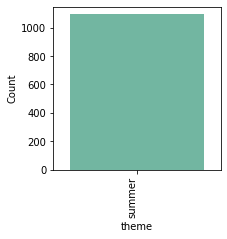

In [177]:
#incpecting theme coloumn
plt.figure(figsize=(3, 3))
ax = sns.countplot(x = 'theme',
                   order = df['theme'].value_counts().index,
                   palette= "Set2",
                   data=df)
ax.set(xlabel='theme', ylabel='Count')
plt.xticks(rotation=90, ha='right')
plt.show()

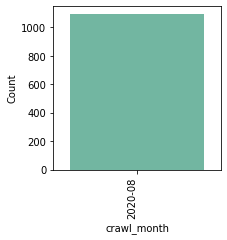

In [178]:
#inspecting Crawl month column
plt.figure(figsize=(3, 3))
ax = sns.countplot(x = 'crawl_month',
                   order = df['crawl_month'].value_counts().index,
                   palette= "Set2",
                   data=df)
ax.set(xlabel='crawl_month', ylabel='Count')
plt.xticks(rotation=90, ha='right')
plt.show()

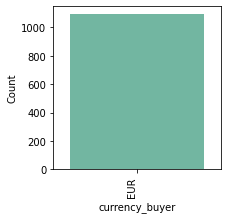

In [179]:
#inspecting currency buyer column
plt.figure(figsize=(3, 3))
ax = sns.countplot(x = 'currency_buyer',
                   order = df['currency_buyer'].value_counts().index,
                   palette= "Set2",
                   data=df)
ax.set(xlabel='currency_buyer', ylabel='Count')
plt.xticks(rotation=90, ha='right')
plt.show()

In [180]:
df['shipping_option_name'].value_counts()


Livraison standard         1047
Standard Shipping            16
Envio Padrão                  6
الشحن القياسي                 4
Expediere Standard            4
Envío normal                  3
Standardversand               3
Standardowa wysyłka           2
Standart Gönderi              2
Livraison Express             2
Стандартная доставка          2
Spedizione standard           1
ការដឹកជញ្ជូនតាមស្តង់ដារ       1
Name: shipping_option_name, dtype: int64

<Axes: xlabel='merchant_rating', ylabel='count'>

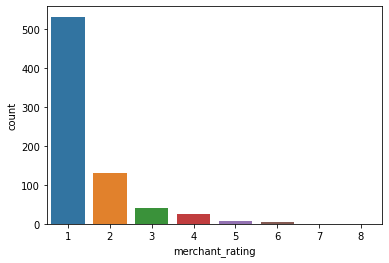

In [181]:
sns.countplot(x=df['merchant_rating'].value_counts())


<Axes: xlabel='merchant_title', ylabel='count'>

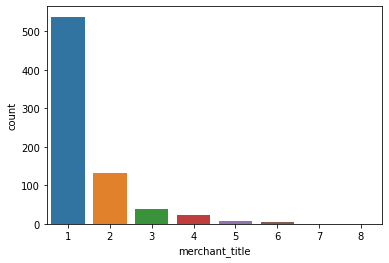

In [182]:
sns.countplot(x=df['merchant_title'].value_counts())


 these columns (currency_buyer,crawl_month, theme,merchant_profile_picture,merchant_name, merchant_info_subtitle, merchant_idmerchant_rating,merchant_title)doesnt **add** any useful information 

In [183]:
#Droping unuseful data
df.drop('tags',axis='columns', inplace=True)
df.drop('shipping_option_name',axis='columns', inplace=True)
df.drop('merchant_title',axis='columns', inplace=True)
df.drop('merchant_name',axis='columns', inplace=True)
df.drop('merchant_info_subtitle',axis='columns', inplace=True)
df.drop('merchant_profile_picture',axis='columns', inplace=True)
df.drop('urgency_text',axis='columns', inplace=True)
df.drop('currency_buyer',axis='columns', inplace=True)
df.drop('merchant_id',axis='columns',inplace=True)
df.drop('crawl_month',axis='columns', inplace=True)
df.drop('theme',axis='columns', inplace=True)
df.drop('id',axis='columns', inplace=True)




In [184]:
df.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,8.00,7,10000,1,4.0,1670,0,0,0,0,...,50,3,0,30,50,0.0,CN,66644,4.137582,1
1,8.00,7,1000,0,4.0,843,1,1,0,0,...,50,3,0,37,50,0.0,CN,25752,4.256873,0
2,6.00,34,100,0,4.0,10,0,0,0,0,...,50,2,0,41,50,0.0,CN,3897,3.928920,0
3,4.67,4,100,1,3.0,82,0,0,0,0,...,5,1,0,25,50,0.0,CN,7497,4.079365,0
4,8.00,11,1000,0,4.0,127,0,0,0,0,...,50,3,0,15,50,1.0,CN,173,4.306358,0


In [185]:
df.tail()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture
1089,4.0,4,10000,0,4.0,2150,0,0,0,0,...,50,1,0,41,50,0.0,CN,230951,4.311066,0
1090,5.0,5,1000,0,5.0,377,1,0,1,0,...,31,2,0,35,50,0.0,CN,2904,4.422521,0
1091,9.0,48,1000,1,4.0,135,0,0,0,0,...,50,3,0,25,50,0.0,CN,6632,3.748794,0
1092,11.0,10,10000,1,4.0,1479,0,0,0,0,...,50,2,0,45,50,1.0,CN,5816,3.936382,0
1093,7.0,6,1000,1,3.0,141,0,0,0,0,...,7,2,0,23,50,1.0,CN,12309,4.045170,1


In [186]:
#e missing values
missing_values_count = df.isnull().sum()

# look at the # of missing points in all columns
missing_values_count[:]

price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
has_urgency_banner              0
origin_country                  0
merchant_rating_count           0
merchant_rating                 0
merchant_has_profile_picture    0
dtype: int64

In [187]:
#One_hot encoding for categorical data
df= pd.get_dummies(df)

i drop the column in the down cell cause it appears in training data after get dummies but does not appear in test data annd this cause an error  😢

In [188]:
df.drop(['origin_country_GB'],axis=1, inplace=True)


In [189]:
df.head()


,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,product_variation_size_id_Other,product_variation_size_id_S,product_variation_size_id_XL,product_variation_size_id_XS,product_variation_size_id_XXL+,product_variation_size_id_XXS+,origin_country_CN,origin_country_SG,origin_country_US,origin_country_VE
0,8.00,7,10000,1,4.0,1670,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,8.00,7,1000,0,4.0,843,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,6.00,34,100,0,4.0,10,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4.67,4,100,1,3.0,82,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.00,11,1000,0,4.0,127,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1093
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            1093 non-null   float64
 1   retail_price                     1093 non-null   int64  
 2   units_sold                       1093 non-null   int64  
 3   uses_ad_boosts                   1093 non-null   int64  
 4   rating                           1093 non-null   float64
 5   rating_count                     1093 non-null   int64  
 6   badges_count                     1093 non-null   int64  
 7   badge_local_product              1093 non-null   int64  
 8   badge_product_quality            1093 non-null   int64  
 9   badge_fast_shipping              1093 non-null   int64  
 10  product_variation_inventory      1093 non-null   int64  
 11  shipping_option_price            1093 non-null   int64  
 12  shipping_is_express 

In [191]:
#Defining the labels and the features of our train dataset 
Xtrain=df.loc[:,df.columns!='rating']
Ytrain = df.rating

In [192]:
Xtrain.shape

(1093, 43)

In [193]:
Ytrain.shape

(1093,)

In [194]:
from sklearn.preprocessing import MinMaxScaler
#Scaling 
scaler = MinMaxScaler()
Xtrain = scaler.fit_transform(Xtrain)

** DecisionTreeClassifier**

In [195]:
from sklearn.model_selection import GridSearchCV #importing GidSearchCv
from sklearn import tree #importing tree 
from sklearn.tree import DecisionTreeClassifier #importing DecisionTreeClassifier
#Using gridsearch to find the best parameters
param_grid = {'criterion' :['gini', 'entropy'],
              'max_depth' : [2,4,6,7,8,10,12,14,16]
             }
clf = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=16, verbose=True)
grid_search.fit(Xtrain, Ytrain)

Fitting 16 folds for each of 18 candidates, totalling 288 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=16.



GridSearchCV(cv=16, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 7, 8, 10, 12, 14, 16]},
             verbose=True)

In [196]:
print(grid_search.best_params_, '\n' , grid_search.best_estimator_, '\n The best score is :', grid_search.best_score_)


{'criterion': 'gini', 'max_depth': 4} 
 DecisionTreeClassifier(max_depth=4, random_state=1024) 
 The best score is : 0.7876705029838021


In [197]:
#Building a decison tree model using these parameters
clf = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=1024)
clf.fit(Xtrain,Ytrain) #Fitting the model with our samples of the train dataset

DecisionTreeClassifier(max_depth=4, random_state=1024)

**Support vector model**

In [198]:
#Building Svm model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='linear', gamma=0.001, C=10)
svm.fit(Xtrain,Ytrain)

SVC(C=10, gamma=0.001, kernel='linear')

In [199]:
#Building a naive bayes 
from sklearn.naive_bayes import ComplementNB
gnb = ComplementNB()
gnb.fit(Xtrain,Ytrain)

ComplementNB()

In [200]:
from sklearn.ensemble import RandomForestClassifier

In [201]:
rf =RandomForestClassifier(n_estimators = 300, max_features ='sqrt', max_depth = 5, random_state = 18).fit(Xtrain, Ytrain)

In [202]:
rf.fit(Xtrain,Ytrain)

RandomForestClassifier(max_depth=5, n_estimators=300, random_state=18)

**test data**

In [203]:
#Reading the test dataset
df1 = pd.read_csv('/content/test_new.csv')

In [204]:
#Defining _id that hold the values of the Ids
_id= df1['id']

In [205]:
#Checking the count of NaN values in al the columns
df1.duplicated().sum()
df1.isnull().sum()

price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    12
product_variation_size_id         2
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              355
urgency_text                    355
origin_country                    5
merchant_title                    0
merchant_name                     0
merchant_info_subtitle            1
merchant_rating_count             0
merchant_rating                   0
merchant_id                 

In [206]:
# First, lets drop duplicates (if any)
df_1= df1.drop_duplicates()

In [207]:
#Checking the count of NaN values in al the columns
df_1.duplicated().sum()


0

In [208]:
df_1.isnull().sum()

price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    12
product_variation_size_id         2
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              355
urgency_text                    355
origin_country                    5
merchant_title                    0
merchant_name                     0
merchant_info_subtitle            1
merchant_rating_count             0
merchant_rating                   0
merchant_id                 

In [209]:
df_1['urgency_text'] = df_1['urgency_text'].replace({
    'Quantité limitée !' : 'Limited Quantity', 
    'Réduction sur les achats en gros': 'Wholesale discount', 
    np.nan: 'None'
})

In [210]:
Country = df_1.loc[:, 'origin_country']
Country

0      CN
1      CN
2      CN
3      CN
4      CN
       ..
474    VE
475    CN
476    VE
477    CN
478    CN
Name: origin_country, Length: 479, dtype: object

In [211]:
#Filling the Nan values with the most frequent value which is CN
df_1.loc[:, 'origin_country']=Country.fillna('CN')

In [212]:
Urgency = df_1.loc[:,'has_urgency_banner']
Urgency

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
474    NaN
475    NaN
476    1.0
477    1.0
478    1.0
Name: has_urgency_banner, Length: 479, dtype: float64

In [213]:
#Filling the missing values with zeros
df_1.loc[:,'has_urgency_banner']=df_1.loc[:,'has_urgency_banner'].fillna(0)

In [214]:
#Gathering all the value with the same meaning and replacing its name with its actual name
df_1['product_variation_size_id'].replace(['S', 'S.', 's', 'Size S', 'Size-S', 'Size S.', 'Suit-S', 'size S','S Pink', 'pants-S', 'US-S', 'SIZE S', 'S (waist58-62cm)', 'Size--S', '25-S', 'Size/S', 'S Diameter 30cm', 'S..', 'S(Pink & Black)'], 'S', inplace=True)
df_1['product_variation_size_id'].replace(['XS', 'XS.', 'SIZE XS', 'Size-XS'], 'XS', inplace=True)
df_1['product_variation_size_id'].replace(['XXS', 'XXXS', 'SIZE-XXS', 'Size -XXS', 'Size XXS', 'Size-XXS', 'SIZE XXS'], 'XXS+', inplace=True)
df_1['product_variation_size_id'].replace(['M', 'M.', 'Size M'], 'M', inplace=True)
df_1['product_variation_size_id'].replace(['L', 'SizeL', '32/L', 'L.', 'Size-L'], 'L', inplace=True)
df_1['product_variation_size_id'].replace(['XL', '2XL', '1 PC - XL', 'X   L'], 'XL', inplace=True)
df_1['product_variation_size_id'].replace(['XXL', '4XL', '2XL', 'Size4XL', '3XL', 'XXXXXL', '1 PC - XL', 'SIZE-4XL', '04-3XL', 'Size-5XL', 'XXXXL', '5XL', 'XXXL'], 'XXL+', inplace=True)
size_val_counts = df_1['product_variation_size_id'].value_counts()
# Select the values where the count is less than 5 and Nans and puting them under category other
minority = size_val_counts[size_val_counts <= 5].index
df_1.loc[df_1['product_variation_size_id'].isin(minority), 'product_variation_size_id'] = "Other"
df_1['product_variation_size_id'] = df_1['product_variation_size_id'].replace(np.nan, "Other")

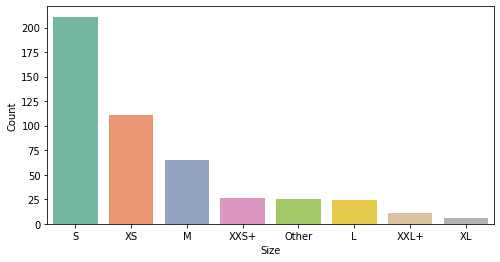

In [215]:
#ploting size column after handling it
plt.figure(figsize=(8, 4))
ax = sns.countplot(x = 'product_variation_size_id',
                   order = df_1['product_variation_size_id'].value_counts().index,
                   palette= "Set2",
                   data=df_1)
ax.set(xlabel='Size', ylabel='Count')

plt.show()

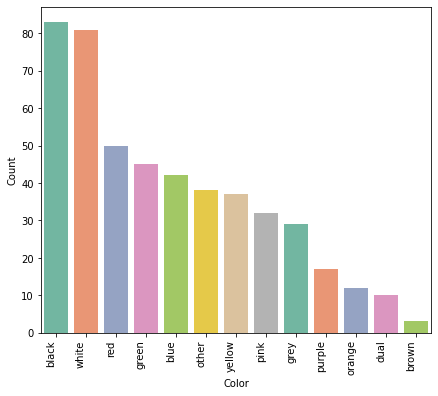

In [216]:
#Fixing the colors column
df_1['product_color'] = df_1.product_color.apply(switch)
plt.figure(figsize=(7, 6))
ax = sns.countplot(x = 'product_color',
                   order = df_1['product_color'].value_counts().index,
                   palette= "Set2",
                   data=df_1)
ax.set(xlabel='Color', ylabel='Count')
plt.xticks(rotation=90, ha='right')
plt.show()

In [217]:
#Droping unuseful data
df_1.drop('tags',axis='columns', inplace=True)
df_1.drop('shipping_option_name',axis='columns', inplace=True)
df_1.drop('merchant_title',axis='columns', inplace=True)
df_1.drop('merchant_name',axis='columns', inplace=True)
df_1.drop('merchant_info_subtitle',axis='columns', inplace=True)
df_1.drop('merchant_profile_picture',axis='columns', inplace=True)
df_1.drop('urgency_text',axis='columns', inplace=True)
df_1.drop('currency_buyer',axis='columns', inplace=True)
df_1.drop('merchant_id',axis='columns',inplace=True)
df_1.drop('crawl_month',axis='columns', inplace=True)
df_1.drop('theme',axis='columns', inplace=True)
df_1.drop('id',axis='columns', inplace=True)

In [218]:
df_1.head()

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color,...,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,5.75,5,10,1,0,0,0,0,0,white,...,5,2,0,139,50,0.0,CN,3,2.333333,0
1,7.00,7,5000,0,579,0,0,0,0,black,...,50,2,0,31,50,0.0,CN,4213,4.058391,0
2,5.00,16,1000,1,62,0,0,0,0,blue,...,20,2,0,41,50,0.0,CN,10501,4.029235,0
3,18.00,27,5000,1,1903,0,0,0,0,blue,...,50,5,0,42,50,0.0,CN,15855,4.052917,0
4,12.00,81,20000,0,1799,0,0,0,0,white,...,50,3,0,38,50,0.0,CN,151914,4.127921,0


#encoding test data

In [219]:
df_11 = pd.get_dummies(df_1, columns = ['product_variation_size_id','product_color','origin_country'])


In [220]:
df_11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479 entries, 0 to 478
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            479 non-null    float64
 1   retail_price                     479 non-null    int64  
 2   units_sold                       479 non-null    int64  
 3   uses_ad_boosts                   479 non-null    int64  
 4   rating_count                     479 non-null    int64  
 5   badges_count                     479 non-null    int64  
 6   badge_local_product              479 non-null    int64  
 7   badge_product_quality            479 non-null    int64  
 8   badge_fast_shipping              479 non-null    int64  
 9   product_variation_inventory      479 non-null    int64  
 10  shipping_option_price            479 non-null    int64  
 11  shipping_is_express              479 non-null    int64  
 12  countries_shipped_to  

In [221]:
Xtest=df_11.loc[:]
 
Xtest.shape

(479, 43)

In [222]:
#Scaling 
Xtest = scaler.fit_transform(Xtest)

In [223]:
prediction_rf=rf.predict(Xtest)
print(prediction_rf)

[5. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 5. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 5. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5.

In [224]:
#Predicting using decision tree model
prediction_dt =clf.predict(Xtest)
print(prediction_dt)

[2. 4. 4. 4. 4. 2. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2. 4. 2. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 5. 4.
 4. 4. 4. 2. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 5. 2. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 2. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 5. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 2. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 2. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 2. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2.

In [225]:
#Predicting using Svm model
prediction_svm = svm.predict(Xtest)
print(prediction_svm)

[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 2.
 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 2. 4. 4. 2. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4.

In [226]:
#predicting using naive model
prediction_nb = gnb.predict(Xtest)
print(prediction_nb)

[2. 4. 4. 4. 2. 2. 2. 2. 1. 4. 3. 4. 4. 4. 5. 3. 5. 1. 1. 4. 1. 2. 2. 4.
 1. 2. 5. 5. 1. 4. 3. 3. 2. 2. 1. 1. 1. 1. 2. 3. 5. 1. 4. 1. 1. 1. 4. 1.
 2. 1. 1. 2. 4. 4. 4. 2. 4. 2. 4. 3. 5. 1. 5. 4. 4. 1. 1. 2. 1. 4. 2. 1.
 4. 4. 1. 4. 4. 1. 2. 1. 4. 1. 4. 4. 4. 2. 5. 2. 1. 5. 5. 1. 2. 2. 5. 1.
 5. 2. 4. 3. 1. 1. 4. 1. 2. 1. 2. 4. 4. 4. 2. 4. 1. 5. 3. 4. 5. 4. 3. 1.
 3. 1. 4. 2. 2. 5. 1. 2. 4. 2. 1. 4. 1. 5. 2. 5. 4. 1. 5. 5. 5. 2. 2. 5.
 5. 1. 1. 5. 2. 2. 2. 1. 4. 1. 2. 1. 5. 4. 2. 4. 4. 5. 1. 1. 2. 1. 5. 4.
 4. 5. 1. 1. 5. 1. 2. 2. 4. 2. 4. 2. 5. 4. 2. 1. 4. 4. 4. 5. 4. 1. 2. 2.
 2. 4. 3. 5. 1. 1. 2. 4. 1. 5. 1. 1. 1. 1. 2. 5. 2. 1. 5. 2. 4. 2. 5. 1.
 4. 2. 1. 2. 2. 2. 2. 1. 2. 2. 5. 4. 5. 2. 2. 4. 4. 1. 5. 4. 4. 1. 4. 4.
 5. 4. 4. 2. 4. 5. 2. 1. 2. 2. 1. 5. 1. 4. 2. 5. 2. 2. 1. 1. 5. 4. 2. 4.
 1. 4. 1. 5. 4. 5. 1. 2. 2. 1. 1. 1. 1. 2. 4. 1. 2. 3. 1. 1. 4. 5. 1. 4.
 4. 2. 1. 1. 4. 4. 4. 2. 4. 1. 4. 1. 2. 2. 2. 1. 4. 5. 5. 3. 1. 2. 4. 2.
 2. 2. 4. 1. 2. 2. 2. 2. 2. 1. 1. 1. 2. 2. 5. 4. 2.

In [227]:
#saving the prediction in the file
pred_rf = pd.DataFrame(data={'id': _id, 'rating':prediction_rf})

pred_rf.to_csv('pred_rf.csv', index=False)

In [228]:
#saving the prediction in the file
pred_df = pd.DataFrame(data={'id': _id, 'rating':prediction_nb})

pred_df.to_csv('pred_nb.csv', index=False)

In [229]:
#saving the prediction in the file
pred_df = pd.DataFrame(data={'id': _id, 'rating': prediction_dt})

pred_df.to_csv('pred_dt.csv', index=False)

In [230]:

pred_df.to_csv('df', index=False)

In [231]:
#saving the prediction in the file
pred_df = pd.DataFrame(data={'id': _id, 'rating': prediction_svm})

pred_df.to_csv('pred_svm.csv', index=False)

**trail2**

In [232]:
#Reading the train dataset
df2= pd.read_csv('/content/train_new.csv')

In [233]:
missing_values_count = df2.isnull().sum()

# look at the # of missing points in all the coloumns
missing_values_count[:]

price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    29
product_variation_size_id        12
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              745
urgency_text                    745
origin_country                   12
merchant_title                    0
merchant_name                     4
merchant_info_subtitle            0
merchant_rating_count             0
merchant_rating             

In [234]:
#Letting the rates in range between 1 to 5
df2=df2.loc[df2['rating'].isin([1,2,3,4,5])]

In [235]:
#Checking more details about our data
df2.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,349.0,1.093000e+03,1093.000000,1093.000000,1093.000000
mean,8.283568,23.695334,4522.704483,0.432754,4.004575,916.355901,0.113449,0.019213,0.083257,0.010979,32.835316,2.335773,0.001830,40.483989,49.892955,1.0,2.678107e+04,4.036020,0.155535,772.806038
std,3.836460,31.812401,9829.196136,0.495684,0.582857,2038.307907,0.347588,0.137336,0.276397,0.104251,21.444202,1.003552,0.042757,20.205469,2.015161,0.0,8.620109e+04,0.200409,0.362580,453.559910
min,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,8.000000,1.000000,1.0,4.000000e+00,2.941176,0.000000,2.000000
25%,5.830000,7.000000,100.000000,0.000000,4.000000,24.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.926000e+03,3.918367,0.000000,383.000000
50%,8.000000,10.000000,1000.000000,0.000000,4.000000,144.000000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,8.225000e+03,4.045170,0.000000,753.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.000000,846.000000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.276500e+04,4.166509,0.000000,1167.000000
max,27.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,3.000000,1.000000,1.000000,1.000000,50.000000,7.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,4.577519,1.000000,1572.000000


In [236]:
#droping the unnessary column
df2.drop('tags',axis='columns', inplace=True)
df2.drop('shipping_option_name',axis='columns', inplace=True)
df2.drop('merchant_title',axis='columns', inplace=True)
df2.drop('merchant_name',axis='columns', inplace=True)
df2.drop('merchant_info_subtitle',axis='columns', inplace=True)
df2.drop('merchant_profile_picture',axis='columns', inplace=True)
df2.drop('urgency_text',axis='columns', inplace=True)
df2.drop('currency_buyer',axis='columns', inplace=True)
df2.drop('merchant_id',axis='columns',inplace=True)
df2.drop('crawl_month',axis='columns', inplace=True)
df2.drop('theme',axis='columns', inplace=True)
df2.drop('id',axis='columns', inplace=True)

In [237]:
subset_df_data = df2.loc[:, 'origin_country']
subset_df_data

0       CN
1       CN
2       CN
3       CN
4       CN
        ..
1089    CN
1090    CN
1091    CN
1092    CN
1093    CN
Name: origin_country, Length: 1093, dtype: object

In [238]:
#filling the missing values in origin_country columns
df2.loc[:, 'origin_country']=subset_df_data.fillna('CN')

In [239]:
#Filling the missing values in urgency banner column
subset_df_data1 = df2.loc[:,'has_urgency_banner']
df2.loc[:,'has_urgency_banner']=subset_df_data1.fillna(0)

In [240]:
#replacing the size valus with its corresponding size category
df2['product_variation_size_id'].replace(['S', 'S.', 's', 'Size S', 'Size-S', 'Size S.', 'Suit-S', 'size S','S Pink', 'pants-S', 'US-S', 'SIZE S', 'S (waist58-62cm)', 'Size--S', '25-S', 'Size/S', 'S Diameter 30cm', 'S..', 'S(Pink & Black)'], 'S', inplace=True)
df2['product_variation_size_id'].replace(['XS', 'XS.', 'SIZE XS', 'Size-XS'], 'XS', inplace=True)
df2['product_variation_size_id'].replace(['XXS', 'XXXS', 'SIZE-XXS', 'Size -XXS', 'Size XXS', 'Size-XXS', 'SIZE XXS'], 'XXS+', inplace=True)
df2['product_variation_size_id'].replace(['M', 'M.', 'Size M'], 'M', inplace=True)
df2['product_variation_size_id'].replace(['L', 'SizeL', '32/L', 'L.', 'Size-L'], 'L', inplace=True)
df2['product_variation_size_id'].replace(['XL', '2XL', '1 PC - XL', 'X   L'], 'XL', inplace=True)
df2['product_variation_size_id'].replace(['XXL', '4XL', '2XL', 'Size4XL', '3XL', 'XXXXXL', '1 PC - XL', 'SIZE-4XL', '04-3XL', 'Size-5XL', 'XXXXL', '5XL', 'XXXL'], 'XXL+', inplace=True)
size_val_counts = df2['product_variation_size_id'].value_counts()
# Select the values where the count is less than 5 
minority = size_val_counts[size_val_counts <= 5].index
df2.loc[df2['product_variation_size_id'].isin(minority), 'product_variation_size_id'] = "Other"
df2['product_variation_size_id'] = df2['product_variation_size_id'].replace(np.nan, "Other")

In [241]:
#checking the unique values or colors column
colors = df2['product_color'].unique()
colors

array(['yellow', 'black', 'white', 'lakeblue', 'apricot', 'brown',
       'winered', 'blue', 'red', 'navyblue', 'green', 'khaki', 'White',
       'white & green', 'multicolor', 'lightpink', 'pink', 'RED',
       'armygreen', 'lightblue', nan, 'coffee', 'grey', 'skyblue',
       'watermelonred', 'pink & black', 'whitefloral', 'purple', 'navy',
       'pink & white', 'rosered', 'orange', 'Black', 'mintgreen',
       'leopardprint', 'gray', 'navy blue', 'star', 'rose', 'lightyellow',
       'camouflage', 'black & yellow', 'whitestripe', 'navyblue & white',
       'black & blue', 'lightred', 'violet', 'gold', 'black & green',
       'white & black', 'burgundy', 'black & white', 'lightgrey',
       'coolblack', 'lightgreen', 'beige', 'darkblue', 'darkgreen',
       'silver', 'wine red', 'Army green', 'pink & blue', 'rainbow',
       'claret', 'floral', 'brown & yellow', 'light green', 'Pink',
       'blue & pink', 'dustypink', 'camel', 'orange-red', 'rosegold',
       'ivory', 'fluorescentg

In [242]:
# convert to lower case
df2['product_color'] = df2['product_color'].str.lower()
# remove trailing white spaces
df2['product_color'] = df2['product_color'].str.strip()

In [243]:
#Matching each color to its corresponding color category
df2['product_color'] = df2.product_color.apply(switch)

In [244]:
missing_values_count = df2.isnull().sum()

# look at the values in all columns after handling them  
missing_values_count[:]

price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
has_urgency_banner              0
origin_country                  0
merchant_rating_count           0
merchant_rating                 0
merchant_has_profile_picture    0
dtype: int64

add new feature to the dataset

In [245]:
#Creating discount feature
df2['percent_discount'] = (df2['retail_price'] - df2['price']) / df2['retail_price'] * 100
df2[['retail_price', 'price', 'percent_discount']].head()

,retail_price,price,percent_discount
0,7,8.00,-14.285714
1,7,8.00,-14.285714
2,34,6.00,82.352941
3,4,4.67,-16.750000
4,11,8.00,27.272727


In [246]:
#One-hot encoding
df2 = pd.get_dummies(df2)

In [247]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1093
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            1093 non-null   float64
 1   retail_price                     1093 non-null   int64  
 2   units_sold                       1093 non-null   int64  
 3   uses_ad_boosts                   1093 non-null   int64  
 4   rating                           1093 non-null   float64
 5   rating_count                     1093 non-null   int64  
 6   badges_count                     1093 non-null   int64  
 7   badge_local_product              1093 non-null   int64  
 8   badge_product_quality            1093 non-null   int64  
 9   badge_fast_shipping              1093 non-null   int64  
 10  product_variation_inventory      1093 non-null   int64  
 11  shipping_option_price            1093 non-null   int64  
 12  shipping_is_express 

In [248]:
df2.drop('product_variation_size_id_XL',axis='columns', inplace=True)


In [249]:
Xtr2=df2.loc[:,df2.columns!='rating'] #defing the features of our train dataset
Ytr2 = df2.rating #defing the lables and assigning them to Ytr

In [250]:
#Xtr2.product_color = pd.Categorical(Xtr2.product_color).codes #converting categorical colors into numeric values


In [251]:
from sklearn.preprocessing import StandardScaler #applying scaling to our data
scaler = StandardScaler().fit(Xtr2)
Xtr2= scaler.transform(Xtr2)

In [252]:
from sklearn import preprocessing


scaler = preprocessing.Normalizer(norm='l2').fit(Xtr2)

In [253]:
#Buildiing our Svm model
from sklearn.svm import SVC   
from sklearn.metrics import accuracy_score

svm1 = SVC(kernel='rbf', gamma=0.001, C=10)
svm1.fit(Xtr2,Ytr2)

SVC(C=10, gamma=0.001)

In [254]:
from sklearn.model_selection import GridSearchCV #importing GidSearchCv
from sklearn import tree #importing tree 
from sklearn.tree import DecisionTreeClassifier #importing DecisionTreeClassifier
#Using gridsearch to find the best parameters
param_grid = {'criterion' :['gini', 'entropy'],
              'max_depth' : [2,4,6,7,8,10,12,14,16]
             }
clf = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=9, verbose=True)
grid_search.fit(Xtr2, Ytr2)

Fitting 9 folds for each of 18 candidates, totalling 162 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=9.



GridSearchCV(cv=9, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 7, 8, 10, 12, 14, 16]},
             verbose=True)

In [255]:
print(grid_search.best_params_, '\n' , grid_search.best_estimator_, '\n The best score is :', grid_search.best_score_)


{'criterion': 'gini', 'max_depth': 4} 
 DecisionTreeClassifier(max_depth=4, random_state=1024) 
 The best score is : 0.7804046425506932


In [256]:
#Building a decison tree model using these parameters
clf1 = DecisionTreeClassifier(criterion="entropy", max_depth=6, random_state=1024)
clf1.fit(Xtr2,Ytr2) #Fitting the model with our samples of the train dataset

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=1024)

**test data trail 2**

In [257]:
#Readinf our test dataset
df22 = pd.read_csv('/content/test_new.csv')

In [258]:
#Assigning id coluns to _id
_id= df1['id']

In [259]:
#df22.info()

In [260]:
#Dropping unnecessary columns 
df22.drop('tags',axis='columns', inplace=True)
df22.drop('shipping_option_name',axis='columns', inplace=True)
df22.drop('merchant_title',axis='columns', inplace=True)
df22.drop('merchant_name',axis='columns', inplace=True)
df22.drop('merchant_info_subtitle',axis='columns', inplace=True)
df22.drop('merchant_profile_picture',axis='columns', inplace=True)
df22.drop('urgency_text',axis='columns', inplace=True)
df22.drop('currency_buyer',axis='columns', inplace=True)
df22.drop('merchant_id',axis='columns',inplace=True)
df22.drop('crawl_month',axis='columns', inplace=True)
df22.drop('theme',axis='columns', inplace=True)
df22.drop('id',axis='columns', inplace=True)

In [261]:
#Filling the missing valus with the most frequent value
df22.loc[:, 'origin_country']=subset_df_data.fillna('CN')

In [262]:
#Filling the missing values with zeros
df22.loc[:,'has_urgency_banner']=df22.loc[:,'has_urgency_banner'].fillna(0)

In [263]:
#Handling Size column
df22['product_variation_size_id'].replace(['S', 'S.', 's', 'Size S', 'Size-S', 'Size S.', 'Suit-S', 'size S','S Pink', 'pants-S', 'US-S', 'SIZE S', 'S (waist58-62cm)', 'Size--S', '25-S', 'Size/S', 'S Diameter 30cm', 'S..', 'S(Pink & Black)'], 'S', inplace=True)
df22['product_variation_size_id'].replace(['XS', 'XS.', 'SIZE XS', 'Size-XS'], 'XS', inplace=True)
df22['product_variation_size_id'].replace(['XXS', 'XXXS', 'SIZE-XXS', 'Size -XXS', 'Size XXS', 'Size-XXS', 'SIZE XXS'], 'XXS+', inplace=True)
df22['product_variation_size_id'].replace(['M', 'M.', 'Size M'], 'M', inplace=True)
df22['product_variation_size_id'].replace(['L', 'SizeL', '32/L', 'L.', 'Size-L'], 'L', inplace=True)
df22['product_variation_size_id'].replace(['XL', '2XL', '1 PC - XL', 'X   L'], 'XL', inplace=True)
df22['product_variation_size_id'].replace(['XXL', '4XL', '2XL', 'Size4XL', '3XL', 'XXXXXL', '1 PC - XL', 'SIZE-4XL', '04-3XL', 'Size-5XL', 'XXXXL', '5XL', 'XXXL'], 'XXL+', inplace=True)
size_val_counts = df1['product_variation_size_id'].value_counts()
# Select the values where the count is less than 5 
minority = size_val_counts[size_val_counts <= 5].index
df22.loc[df22['product_variation_size_id'].isin(minority), 'product_variation_size_id'] = "Other"
df22['product_variation_size_id'] = df22['product_variation_size_id'].replace(np.nan, "Other")

In [264]:
df22['product_color'] = df22['product_color'].str.lower()
# remove trailing white spaces
df22['product_color'] = df22['product_color'].str.strip()

In [265]:
df22['product_color'] = df22.product_color.apply(switch)


In [266]:
#Creating discount feature
df22['percent_discount'] = (df22['retail_price'] - df22['price']) / df1['retail_price'] * 100
df22[['retail_price', 'price', 'percent_discount']].head()

,retail_price,price,percent_discount
0,5,5.75,-15.000000
1,7,7.00,0.000000
2,16,5.00,68.750000
3,27,18.00,33.333333
4,81,12.00,85.185185


In [267]:
#Applying one_hot encoding
df22_= pd.get_dummies(df22)

In [268]:
df22_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            479 non-null    float64
 1   retail_price                     479 non-null    int64  
 2   units_sold                       479 non-null    int64  
 3   uses_ad_boosts                   479 non-null    int64  
 4   rating_count                     479 non-null    int64  
 5   badges_count                     479 non-null    int64  
 6   badge_local_product              479 non-null    int64  
 7   badge_product_quality            479 non-null    int64  
 8   badge_fast_shipping              479 non-null    int64  
 9   product_variation_inventory      479 non-null    int64  
 10  shipping_option_price            479 non-null    int64  
 11  shipping_is_express              479 non-null    int64  
 12  countries_shipped_to  

In [269]:
#Defining our features in our test dataset
Xt_2=df22_.loc[:]

In [270]:
#Converting from categorical to numeric
#Xt_2.product_color = pd.Categorical(Xt_2.product_color).codes

In [271]:
#Applying scaling
scaler = StandardScaler().fit(Xt_2)
Xt_2 = scaler.transform(Xt_2)

In [272]:
from sklearn import preprocessing
import numpy as np


scaler = preprocessing.Normalizer(norm='l2').fit(Xt_2)

In [273]:
#Perdicting
prediction_svm_t2= svm1.predict(Xt_2)
print(prediction_svm_t2)

[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 5.
 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 5. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4.

In [274]:
pred_df = pd.DataFrame(data={'id': _id, 'rating': prediction_svm_t2})

pred_df.to_csv('prediction_svm_t2.csv', index=False)

In [275]:
#Perdicting
prediction_dt_t2= clf1.predict(Xt_2)
print(prediction_dt_t2)

[3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 5. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 5. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 5. 4. 5. 4. 5. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 5. 5. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 5. 4. 3.

In [276]:
pred_df = pd.DataFrame(data={'id': _id, 'rating': prediction_dt_t2})

pred_df.to_csv('prediction_dt_t2.csv', index=False)